In [1]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

data=pd.read_csv("/content/rainfall.csv")
print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
print("Filling null values with mean of that particular column")
data=data.fillna(np.mean(data))
print("Mean of data:")
print(np.mean(data))
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())
print("\n\nShape: ",data.shape)


Data heads:
                 SUBDIVISION  YEAR   JAN  ...  Mar-May  Jun-Sep  Oct-Dec
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2  ...    560.3   1696.3    980.3
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  ...    458.3   2185.9    716.7
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  ...    236.1   1874.0    690.6
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4  ...    506.9   1977.6    571.0
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3  ...    309.7   1624.9    630.8

[5 rows x 19 columns]
Null values in the dataset before preprocessing:
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64
Filling null values with mean of that particular column
Mean of data:
YEAR       1958.218659
JAN          18.957320
FEB    

In [3]:
print("Info:")
print(data.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtype

In [5]:
print("Group by:")
data.groupby('SUBDIVISION').size()

Group by:


SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             110
ARUNACHAL PRADESH                      97
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH                115
COASTAL KARNATAKA                     115
EAST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
GANGETIC WEST BENGAL                  115
GUJARAT REGION                        115
HARYANA DELHI & CHANDIGARH            115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
JHARKHAND                             115
KERALA                                115
KONKAN & GOA                          115
LAKSHADWEEP                           114
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
NORTH INTERIOR KARNATAKA              115
ORISSA                

In [6]:
print("Co-Variance =",data.cov())
print("Co-Relation =",data.corr())

Co-Variance =                 YEAR          JAN  ...        Jun-Sep       Oct-Dec
YEAR     1098.319127   -62.525455  ...    -220.389375    -56.011703
JAN       -62.525455  1126.880700  ...    -537.708253    507.405040
FEB       -26.333846   549.299548  ...    1291.239831    130.324910
MAR        31.608776   627.375837  ...    5354.542547    702.446620
APR        17.985597   475.344306  ...   18800.990715   3611.891111
MAY        14.668989   535.377197  ...   43086.245286  10689.487044
JUN      -105.646427  -265.334667  ...  147777.656772  15929.294431
JUL      -144.815256  -465.128448  ...  172787.647754   8543.095960
AUG        40.268753    75.536029  ...  111996.536530   4889.354198
SEP       -29.893921   110.216877  ...   67119.849971   7199.381976
OCT         7.922814    41.252990  ...   29204.838323  14283.355731
NOV       -42.624271   154.517515  ...    6116.134359   9219.400872
DEC       -26.804831   311.215537  ...    1265.311019   4279.018309
ANNUAL   -239.492392  3182.200682 

In [7]:
corr_cols=data.corr()['ANNUAL'].sort_values()[::-1]
print("Index of correlation columns:",corr_cols.index)


Index of correlation columns: Index(['ANNUAL', 'Jun-Sep', 'JUN', 'JUL', 'AUG', 'SEP', 'MAY', 'Mar-May',
       'OCT', 'APR', 'Oct-Dec', 'MAR', 'NOV', 'DEC', 'FEB', 'Jan-Feb', 'JAN',
       'YEAR'],
      dtype='object')


Scatter plot of annual and january attributes


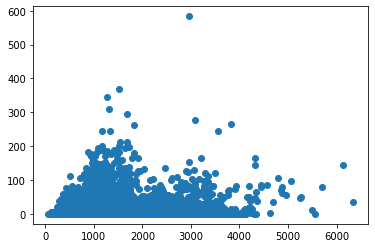

In [8]:
print("Scatter plot of annual and january attributes")
plt.scatter(data.ANNUAL,data.JAN)


Box Plot of annual rainfall data in years 1901-2015


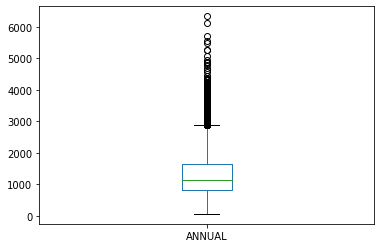

In [9]:
print("Box Plot of annual rainfall data in years 1901-2015")
data['ANNUAL'].plot(kind='box',sharex=False,sharey=False)


Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:


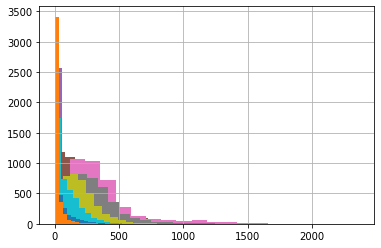

In [10]:
print("Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:")
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20)
data['MAY'].hist(bins=20)
data['JUN'].hist(bins=20)
data['JUL'].hist(bins=20)
data['AUG'].hist(bins=20)
data['SEP'].hist(bins=20)
data['OCT'].hist(bins=20)
data['NOV'].hist(bins=20)
data['DEC'].hist(bins=20)


Histogram showing the annual rainfall of the all states:


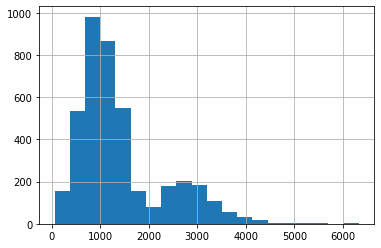

In [11]:
print("Histogram showing the annual rainfall of the all states:")
data['ANNUAL'].hist(bins=20)


Violin plot of the ANNUAL attribute :-


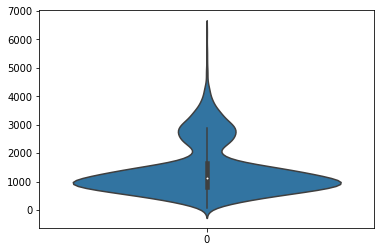

In [12]:
print("Violin plot of the ANNUAL attribute :-")
sb.violinplot(data=data['ANNUAL'])


___Multiple Linear regression model between annual rainfall and the periodic rainfall___
Train x shape (2881, 4) ; Test_x (1235, 4)
Train y shape (2881,) ; Test_y (1235,)
Mean Squared Error = 3326.41575354187
Root Mean Squared Error = 57.675087806971476
Mean Absolute Error = 10.953757241508555
r2_score = 0.9958637383726687


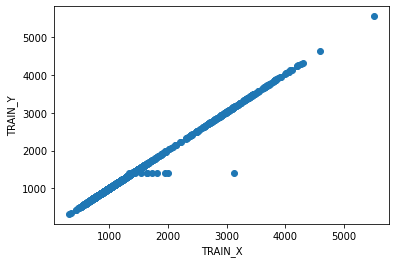

In [23]:
from sklearn import linear_model
print("___Multiple Linear regression model between annual rainfall and the periodic rainfall___")
y=data['ANNUAL']
x=data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,shuffle=False)
'''train_x=train_x[:,np.newaxis]
test_x=test_x[:,np.newaxis]'''
print("Train x shape",train_x.shape,"; Test_x",test_x.shape)
print("Train y shape",train_y.shape,"; Test_y",test_y.shape)
lm=linear_model.LinearRegression()
lm.fit(train_x,train_y)
pred=lm.predict(test_x)
#print(test_y)
#print(pred)
print("Mean Squared Error =",mean_squared_error(test_y,pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(test_y,pred)))
print("Mean Absolute Error =",mean_absolute_error(test_y,pred))
print("r2_score =",r2_score(test_y,pred))
plt.scatter(pred,test_y)
plt.xlabel('TRAIN_X')
plt.ylabel('TRAIN_Y')
plt.show()
